In [2]:
import pandas as pd
import polars as pl

In [ ]:
df_hybrid = pd.read_csv('data/g2f_2018_hybrid_data_clean.csv')

# Find the header line (starts with '#CHROM') and read from there
with open('data/G2F_PHG_minreads1_Mo44_PHW65_MoG_assemblies_14112019_filtered_plusParents.vcf', encoding='cp1252') as f:
	for i, line in enumerate(f):
		if line.startswith('#CHROM'):
			header_line = i
			break

df_genomic = pd.read_csv(
	'data/G2F_PHG_minreads1_Mo44_PHW65_MoG_assemblies_14112019_filtered_plusParents.vcf',
	delimiter='\t',
	skiprows=header_line,
	header=0
)

In [4]:
df_hybrid.where(pd.notna(df_hybrid), None, inplace=True)

pl_df_genomic = pl.from_pandas(df_genomic)
pl_df_hybrid = pl.from_pandas(df_hybrid)

In [5]:
df_agronomic = pl.read_csv('data/g2f_2018_agronomic_information.csv', encoding='cp1252')
df_soil = pl.read_csv('data/g2f_2018_soil_data.csv', encoding='cp1252')
df_cooperators = pl.read_csv('data/g2f_2018_cooperators_list.csv', encoding='cp1252')
df_field_metadata = pl.read_csv('data/g2f_2018_field_metadata.csv', encoding='cp1252')

In [6]:
pl_df_hybrid.describe()

statistic,Field-Location,RecId,Source,Pedigree,Family,Replicate,Block,Plot,Range,Pass,Tester/Group,"Local Check (Yes, No)",Plot Length Field,Alley Length,Row Spacing,Plot Area,Rows/Plot,Packet/Plot,Kernels/Packet,# Seed,Date Planted,Date Harvested,Anthesis [date],Silking [date],Pollen DAP [days],Silk DAP [days],Plant Height [cm],Ear Height [cm],Stand Count [plants],Stand [%],Root Lodging [plants],Stalk Lodging [plants],Grain Moisture [%],Test Weight [lbs/bu],Plot Weight [lbs],Grain Yield [bu/A],"Plot Discarded [enter ""Yes"" or ""blank""]",Comments,"Filler [enter ""filler"" or ""blank""]",[add additional measurements here]
str,str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64
"""count""","""24629""",22830.0,"""24521""","""24629""","""24412""",24629.0,24229.0,24629.0,18225.0,18225.0,"""24411""","""24629""",24629.0,24629.0,24629.0,24629.0,24629.0,24629.0,24229.0,24229.0,"""24629""","""24629""","""19465""","""19399""",19465.0,19399.0,23329.0,23314.0,19835.0,19435.0,4191.0,6276.0,24024.0,20040.0,24026.0,24023.0,"""250""","""1190""","""75""",0.0
"""null_count""","""0""",1799.0,"""108""","""0""","""217""",0.0,400.0,0.0,6404.0,6404.0,"""218""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,400.0,400.0,"""0""","""0""","""5164""","""5230""",5164.0,5230.0,1300.0,1315.0,4794.0,5194.0,20438.0,18353.0,605.0,4589.0,603.0,606.0,"""24379""","""23439""","""24554""",24629.0
"""mean""",null,4.1022e6,null,null,null,1.550611,2.420075,145.39957,21.26085,38.96834,null,null,21.744407,3.080799,30.746437,95.469572,2.0,1.434731,66.031615,82.640307,null,null,null,null,62.385307,63.617815,227.227977,107.462787,61.286564,74.326434,12.269148,7.970204,18.906409,56.710218,20.273284,154.955588,null,null,null,null
"""std""",null,231797.147995,null,null,null,0.561261,1.627429,96.283039,23.694965,31.677227,null,null,2.857864,0.989041,2.396514,14.876212,0.0,0.495732,24.226601,10.871103,null,null,null,null,6.284012,6.389893,34.368733,19.976424,12.640512,12.613112,17.786767,10.185353,4.302735,5.661169,7.000379,43.532082,null,null,null,null
"""min""","""ARH1""",3.060523e6,"""10SKRL:Breed:0994/0993""","""1319 YHR""","""DII-EARLY""",1.0,1.0,1.0,1.0,1.0,"""DII-EARLY""","""No""",16.0,2.0,30.0,60.0,2.0,1.0,25.0,50.0,"""3/8/2018""","""10/15/2018""","""5/11/2018""","""5/11/2018""",44.0,44.0,104.0,49.0,3.0,3.33,0.0,1.0,3.56,5.08,0.1277,9.81,"""Yes""","""""gap""","""fIller""",null
"""25%""",null,3.957522e6,null,null,null,1.0,1.0,65.0,7.0,16.0,null,null,20.0,2.5,30.0,87.5,2.0,1.0,40.0,80.0,null,null,null,null,58.0,60.0,203.0,93.0,55.0,68.75,1.0,2.0,16.3,55.19,15.98,124.83,null,null,null,null
"""50%""",null,3.958236e6,null,null,null,2.0,2.0,134.0,14.0,30.0,null,null,21.0,3.0,30.0,87.5,2.0,1.0,80.0,80.0,null,null,null,null,62.0,63.0,230.0,107.0,62.0,76.25,3.0,4.0,18.4,57.0,19.98,155.31,null,null,null,null
"""75%""",null,4.227128e6,null,null,null,2.0,3.0,213.0,25.0,52.0,null,null,25.0,3.5,30.0,110.0,2.0,2.0,88.0,88.0,null,null,null,null,66.0,68.0,251.0,120.0,69.0,82.5,15.0,10.0,21.4,58.71,23.63,185.05,null,null,null,null
"""max""","""WIH2""",4.557401e6,"""WL13-7918/PHP02""","""TX779/LH195""","""YELLOW STRIPE""",3.0,7.0,400.0,123.0,136.0,"""YELLOW STRIPE""","""Yes""",25.0,6.0,40.0,126.67,2.0,2.0,110.0,110.0,"""5/8/2018""","""9/27/2018""","""8/7/2018""","""8/9/2018""",82.0,82.0,391.0,241.0,97.0,100.0,78.0,100.0,40.86,128.0,67.5,370.7,"""Yes""","""tall!""","""fIller""",null


In [7]:
pl_df_genomic.describe()

statistic,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GE18N213,GE18N080,GE18N143,GE18N031,GE18N070,GE18N351,GE18N147,GE18N040,GE18N117,GE18N310,GE18N064,GE18N210,GE18N259,GE18N251,GE18N232,GE18N035,GE18N393,GE18N272,GE18N260,GE18N293,GE18N178,GE18N048,GE18N024,GE18N038,GE18N028,GE18N056,GE18N114,…,GE18N256,GE18N431,GE18N164,GE18N352,GE18N036,GE18N138,GE18N436,GE18N015,GE18N354,GE18N019,GE18N103,GE18N319,GE18N052,GE18N249,GE18N069,GE18N082,GE18N067,GE18N186,GE18N150,GE18N160,GE18N053,GE18N378,GE18N365,GE18N008,GE18N054,GE18N007,GE18N401,GE18N116,GE18N376,GE18N184,GE18N340,GE18N017,GE18N428,GE18N115,GE18N298,GE18N018,GE18N308
str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",1.353525e6,1.353525e6,"""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""",…,"""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525""","""1353525"""
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",…,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",4.982385,1.2350e8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",2.818017,7.9398e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""",1.0,59303.0,"""S10_100051854""","""A""","""+""",""".""","""PASS""","""AC=10,100;AN=544""","""GT""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""",…,"""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","""./.""","

In [8]:
import matplotlib.pyplot as plt

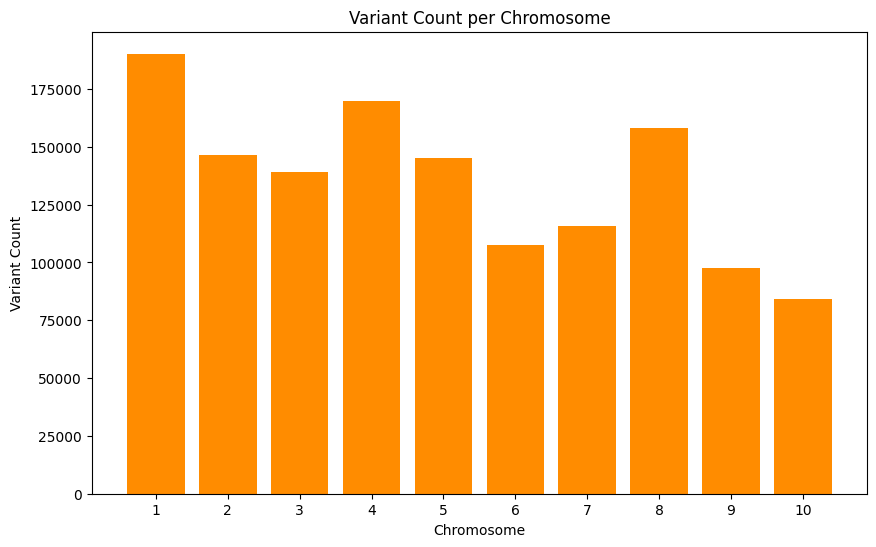

In [23]:
# Plot the count of variants per chromosome
chrom_counts = df_genomic.groupby('#CHROM').size()
plt.figure(figsize=(10, 6))
plt.bar(chrom_counts.index.astype(str), chrom_counts.values, color='darkorange')
plt.title('Variant Count per Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Variant Count')
plt.show()


In [ ]:
# Select only the genotype columns (GE18...)
geno_cols = [col for col in pl_df_genomic.columns if col.startswith("GE18")]

# Function to check if genotype is inbred (0/0 or 1/1)
def is_inbred(geno):
    return geno in ["0/0", "1/1"]

# Count inbred calls per individual
inbred_counts = {}
for col in geno_cols:
    inbred_counts[col] = pl_df_genomic.select(
        pl.col(col).map_elements(is_inbred).sum()
    )[0, 0]

# Convert to DataFrame for plotting
inbred_df = pd.DataFrame.from_dict(inbred_counts, orient="index", columns=["inbred_count"])

# Normalize by total number of loci (optional, for proportions)
inbred_df["inbred_fraction"] = inbred_df["inbred_count"] / len(pl_df_genomic)

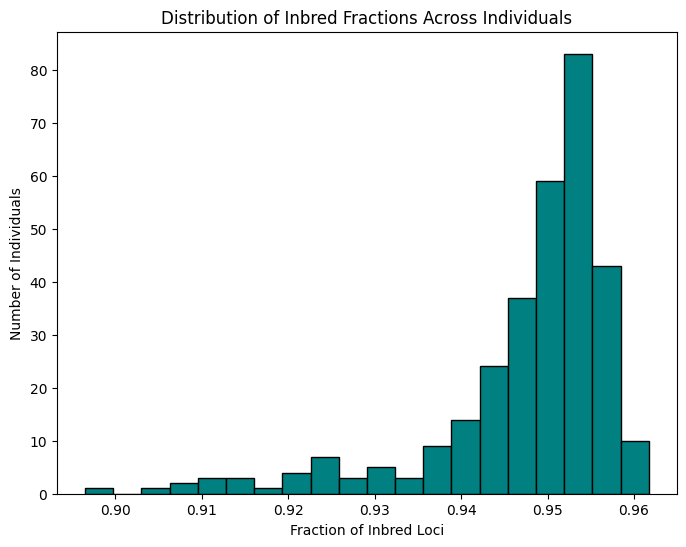

In [30]:
plt.figure(figsize=(8,6))
plt.hist(inbred_df["inbred_fraction"], bins=20, edgecolor="black", color='teal')
plt.xlabel("Fraction of Inbred Loci")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Inbred Fractions Across Individuals")
plt.show()


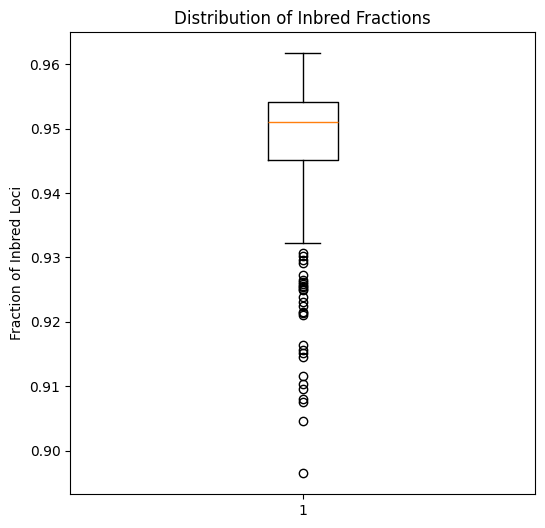

In [29]:
plt.figure(figsize=(6,6))
plt.boxplot(inbred_df["inbred_fraction"], vert=True)
plt.ylabel("Fraction of Inbred Loci")
plt.title("Distribution of Inbred Fractions")
plt.show()
